Observations

-The temperatures are higher for cities in negative latitudes during this time of the year because they are in their summer 

-There is a small correlation of higher humidity near the Prime Meridian (center of longitude)

-There is a strong relationship between latitude and temperature, which shows the our seasonal weather is more depenedent upon latitude than longitude 

In [24]:
from citipy import citipy
import json
import random
from random import uniform
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests 
import pandas as pd
import openweathermapy.core as ow
import seaborn as sns
from config import api_key

In [25]:

settings = {"units": "imperial", "appid": api_key}



In [26]:
cities_df = pd.DataFrame(columns=("City", "Country", "Lat", "Lng", "Humidity", "Cloudiness", "Date","Max Temp", "Wind Speed"))
cities_df


,City,Country,Lat,Lng,Humidity,Cloudiness,Date,Max Temp,Wind Speed


In [27]:
#Generate City List
#sample_size_lim = 1500
#sample_size = len(cities_df)
lat = []
lon = []
cities = []


for i in range (540): 
    
    lati = (random.randrange(-90,90,1))
    long = (random.randrange(-180,180,1))
    city = citipy.nearest_city(lati,long)
    city = city.city_name
    index = len(cities)
    lat.append(lat)
    lon.append(long)
    cities.append(city)
    cities_df.set_value(index, "City", city)
    
cities_df.head()
None

In [28]:
#for index, row in cities_df.iterrows():
#targeturl = url + "appid=" + api_key + "&q=" + trial + "&units=" + units
  #  print(f"Now retrieving weather for #%s city")
   # print(targeturl)
    # counter += 1
    #, %s" % ( counter, cities)
    # % (cities_df["City"]))
   

In [29]:
#trial

In [30]:
#trial = "cities_df['City']"
counter = []
count = 0
 
weather_data = []
#targeturl = url + "appid=" + api_key + "&q=" + trial + "&units=" + units

for city in cities:
    if count < 540:
        try: 
            response = ow.get_current(city, **settings)
            weather_data.append(response)
            count +=1 
            counter.append(count)
        except Exception as e:
            #print(targeturl)
            print(response)
            print(city, ": not found  ", e)
            
            continue





    


{'coord': {'lon': -113.58, 'lat': 37.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.4, 'pressure': 1025, 'humidity': 20, 'temp_min': 46.4, 'temp_max': 46.4}, 'visibility': 16093, 'wind': {'speed': 2.39, 'deg': 89.0011}, 'clouds': {'all': 1}, 'dt': 1511060160, 'sys': {'type': 1, 'id': 2826, 'message': 0.1641, 'country': 'US', 'sunrise': 1511101064, 'sunset': 1511137296}, 'id': 5546220, 'name': 'Saint George', 'cod': 200}
warqla : not found   HTTP Error 404: Not Found
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 602, 'main': 'Snow', 'description': 'heavy snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 33.8, 'pressure': 993, 'humidity': 86, 'temp_min': 33.8, 'temp_max': 33.8}, 'visibility': 1200, 'wind': {'speed': 25.28, 'deg': 230, 'gust': 17.5}, 'clouds': {'all': 75}, 'dt': 1511059200, 'sys': {'type': 1, 'id': 4754, 'message': 0.1648, 'country': 'AR', 'sunrise': 1511079029, 'sun

{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.3, 'pressure': 1030.31, 'humidity': 100, 'temp_min': 73.3, 'temp_max': 73.3, 'sea_level': 1030.36, 'grnd_level': 1030.31}, 'wind': {'speed': 17.72, 'deg': 138.501}, 'clouds': {'all': 48}, 'dt': 1511060939, 'sys': {'message': 0.1651, 'country': 'PF', 'sunrise': 1511100386, 'sunset': 1511148277}, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
soyo : not found   HTTP Error 404: Not Found
{'coord': {'lon': -63.9, 'lat': -8.76}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1008, 'humidity': 94, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1511060400, 'sys': {'type': 1, 'id': 4560, 'message': 0.1659, 'country': 'BR', 'sunrise': 1511084692, 'sunset': 15

In [31]:
print(len(weather_data))

515


In [32]:
weather_data
None

In [33]:
temp = weather_data[0]['main']['temp']

In [34]:
summary = ["name", "dt","sys.country","coord.lat", "coord.lon", "main.temp_max", "main.humidity", "clouds.all", "wind.speed"]
data = [response(*summary) for response in weather_data]
column_names = ["City", "Time", "Country", "Latitude", "Longitude", "Temperature", "Humidity", "Cloud Coverage", "Wind Speed"]
weather_data = pd.DataFrame(data, index = counter, columns=column_names)
print(weather_data)
    

                  City        Time Country  Latitude  Longitude  Temperature  \
1               Simoes  1511061708      BR     -7.60     -40.82        73.80   
2             Yar-Sale  1511061709      RU     66.83      70.83        11.56   
3              Rikitea  1511060939      PF    -23.12    -134.97        73.30   
4          Yellowknife  1511060400      CA     62.46    -114.35       -13.01   
5        Half Moon Bay  1511060160      US     37.46    -122.43        55.40   
6         El Trompillo  1511056800      BO    -17.80     -63.17        75.20   
7          East London  1511060946      ZA    -33.02      27.91        64.93   
8            Upernavik  1511061398      GL     72.79     -56.15         7.60   
9               Dikson  1511061396      RU     73.51      80.55        -2.98   
10            Cidreira  1511061455      BR    -30.18     -50.21        62.50   
11        Saint George  1511060160      US     37.10    -113.58        46.40   
12     Plettenberg Bay  1511061711      

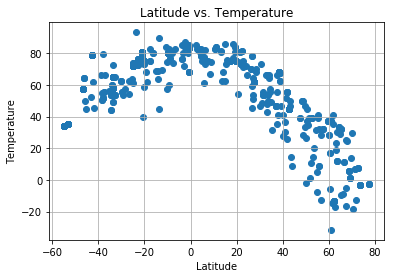

In [39]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature"])
plt.xlabel("Latitude")   
plt.ylabel(("Temperature"))  
plt.title("Latitude vs. Temperature")
plt.grid()
plt.show()


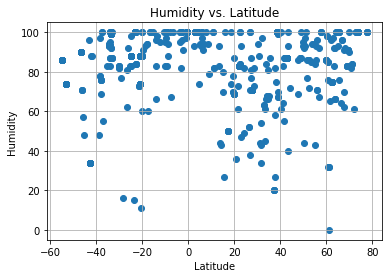

In [36]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude")
plt.grid()
plt.show()

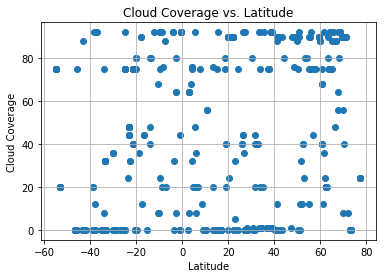

In [37]:
plt.scatter(weather_data["Latitude"], weather_data["Cloud Coverage"],)
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage")
plt.title("Cloud Coverage vs. Latitude")
plt.grid()
plt.show()

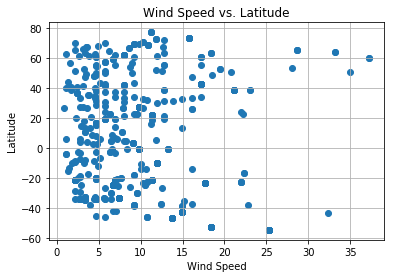

In [50]:
plt.scatter(weather_data["Wind Speed"], weather_data["Latitude"])
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.title("Wind Speed vs. Latitude")
plt.grid()
plt.show()
            

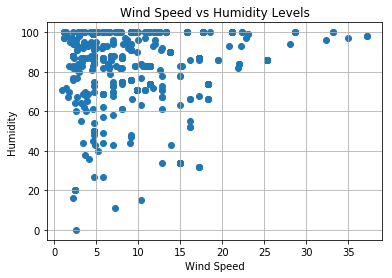

In [55]:
plt.scatter(weather_data["Wind Speed"], weather_data["Humidity"])
plt.xlabel("Wind Speed")
plt.ylabel("Humidity")
plt.title("Wind Speed vs Humidity Levels")
plt.grid()
plt.show()

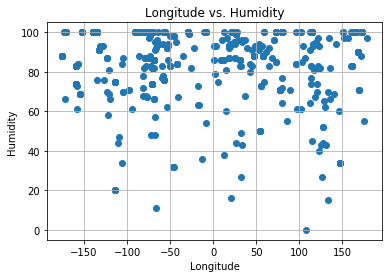

In [54]:
plt.scatter(weather_data["Longitude"], weather_data["Humidity"])
plt.xlabel("Longitude")
plt.ylabel("Humidity")
plt.title("Longitude vs. Humidity")
plt.grid()
plt.show()

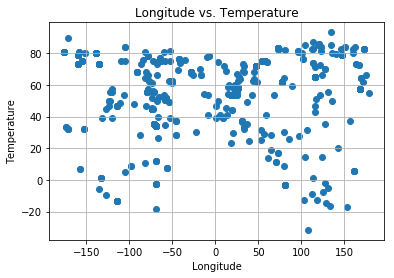

In [52]:
plt.scatter(weather_data["Longitude"], weather_data["Temperature"])
plt.xlabel("Longitude")
plt.ylabel("Temperature")
plt.title("Longitude vs. Temperature")
plt.grid()
plt.show()